MachineLeaningCourse vol.13
# クラスタリング

クラスタリングは__教師なし学習__の機械学習アルゴリズムです。

これまで勉強してきた教師あり学習とは違い、教師なし学習は、データからある種の類似性を発見します。
ここでは、類似するデータのグループを作るアルゴリズムについて説明していきます。

まず最初に、__クラスタリング__という概念について説明します。クラスタリングとは、与えられたデータをいくつかのグループに分類するアルゴリズムです。クラスタリングでは各サンプルがどのぐらい似ているかという指標を計算して、似ているデータをまとめます。

まとめられたデータの集合を__クラスタ__と呼びます。
![](https://s3.amazonaws.com/ai-standard/pic1-3.png)

最も有名なクラスタリングのアルゴリズムである、k-means法を説明していきます。

k-means法がどのようなものか確認するためにデータセットを用意して確認しましょう。

/Users/tsuruoka/.pyenv/versions/anaconda3-2.4.0/lib/python3.5/site-packages/sklearn/utils/fixes.py:64: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() instead
  if 'order' in inspect.getargspec(np.copy)[0]:
/Users/tsuruoka/.pyenv/versions/anaconda3-2.4.0/lib/python3.5/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


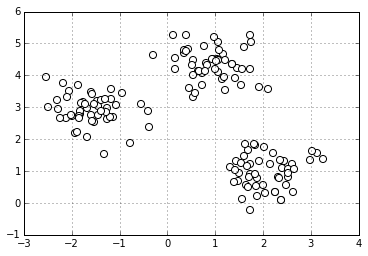

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=150, 
                  n_features=2, 
                  centers=3, 
                  cluster_std=0.5, 
                  shuffle=True, 
                  random_state=0)

plt.scatter(X[:, 0], X[:, 1], c='white', marker='o', s=50)
plt.grid()
plt.show()

クラスタリングは、特徴量の類似度に基づいてサンプルをグループ化することが目的です。

k-means法では、どのようにグループするアルゴリズムが定義されているかを見ていきましょう。

1. クラスタの中心の初期値として、サンプル点からk個のセントロイドをランダムに選び出す。
2. 各サンプルを最も__類似度__が近いセントロイド$\mu^{(j)}$に割り当てる。
$$\mu^{(j)},\ j \in (1, ... , k)$$
3. セントロイドに割り当てられたサンプルの中心にセントロイドを移動する。
4. サンプル点へのクラスタの割り当てが変化しなくなるか、ユーザーの許容値またはイテレーションの最大回数に達するまで、2~3を繰り返す。

では、__類似度__の求め方について解説します。
連続値の特徴量を持つサンプルのクラスタリングにおいてよく使用される距離は、__ユークリッド距離の2乗__(Squared Eucldean distance)です。m次元空間にある2つの点xとyのユークリッド距離の2乗は、以下の様に定義されます。

$$d(x, y)^2 = \sum^{m}_{j=1} (x_{j} - y_{j})^2 = ||x - y||^2_2$$

この式では、インデックスjはサンプル点xとyのj次元目です。上付き文字iはサンプルのインデックス、jはクラスタのインデックスを表します。

オブジェクトの類似性を計る指標としてはユークリッド距離を用いて、単純な最適化問題としてのk-means法を説明します。

ここでは、クラスタ内誤差平方和(SSE)を反復的に最小化するという問題を取り上げます。

$$SSE = \sum^{n}_{i=1}\sum^{k}_{j=1} w^{(i, j)} ||x^{(i)} - \mu^{(j)}||^2_2$$

ここで、$\mu^{(j)}$はクラスタｊの中心点であり、サンプル点$x^{(i)}$がクラスタ内に存在する場合は$w^{(i, j)}=1$、そうでない場合は$w^{(i, j)}=0$になります。

それでは、scikit-learnでモデルを適応していきましょう。

/Users/tsuruoka/.pyenv/versions/anaconda3-2.4.0/lib/python3.5/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


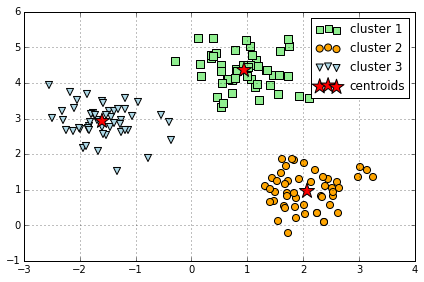

In [27]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters=3,  # クラスタの個数
            init='random',              # セントロイドの初期値をランダムに選択
            n_init=10,                    # 異なるセントロイドの初期値を用いたk-meansアルゴリズムの実行回数
            max_iter=300,            # k-meansアルゴリズム内部の最大イテレーション回数
            tol=1e-04,                   # 収束と判定するための相対的な許容誤差
            random_state=0)       # セントロイドの初期化に用いる乱数生成器の状態

y_km = km.fit_predict(X)

plt.scatter(X[y_km == 0, 0],
            X[y_km == 0, 1],
            s=50,
            c='lightgreen',
            marker='s',
            label='cluster 1')
plt.scatter(X[y_km == 1, 0],
            X[y_km == 1, 1],
            s=50,
            c='orange',
            marker='o',
            label='cluster 2')
plt.scatter(X[y_km == 2, 0],
            X[y_km == 2, 1],
            s=50,
            c='lightblue',
            marker='v',
            label='cluster 3')
plt.scatter(km.cluster_centers_[:, 0],
            km.cluster_centers_[:, 1],
            s=250,
            marker='*',
            c='red',
            label='centroids')
plt.legend()
plt.grid()
plt.tight_layout()
#plt.savefig('./figures/centroids.png', dpi=300)
plt.show()

このコードではクラスタ数を３に指定しています。また、n_init=10を指定することによって、そのつど異なるランダムなセントロイドの初期値を使ってk-means法によるクラスタリングを10回実行し、SSEが最も小さいモデルを最終モデルとして選択しています。

k-meansにもデメリットが数個あります。

ます一つに、乱数を使ったセントロイドの初期化をした場合、不適切な値で初期化してしまうと、クラスタリングがうまくいかなかったり、収束に時間がかかったりすることがあります。

この問題に対する解決策として、複数回k-meansを実行する手段があげられます。

そして、もう一つの解決策として、__k-means++__というアルゴリズムがある。これは、初期のセントロイドを互いに離れた位置に配置することです。それにより、従来のk-meansよりも効果的な、より一貫性のある結果が得られます。

k-menas++を使用するためには、KMeansのinit引数を以下の様に設定します。
> init='k-means++'

### 最適なクラスタ数を求める

#### エルボー法
教師なし学習の課題の一つはクラスタ数の明確な答えが分からないことです。

クラスタリングの性能を評価するには、SSEを用いて比較する必要があります。エルボー法は、SSEをプロットしていき、肘のようにガクッと下がった点が最適なクラスタ数とすることです。

具体的に見ていきましょう。

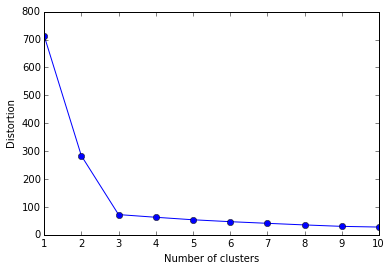

In [31]:
distortions = []

for i  in range(1,11):                　　　　　　　　　# 1~10クラスタまで一気に計算 
    km = KMeans(n_clusters=i,
                init='k-means++',    　　　　　　　　　　# k-means++法によりクラスタ中心を選択
                n_init=10,
                max_iter=300,
                random_state=0)
    km.fit(X)                         　　　　　　　　　　　　　　　　# クラスタリングの計算を実行
    distortions.append(km.inertia_)   # km.fitするとkm.inertia_が得られる

plt.plot(range(1,11),distortions,marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()

上記のグラフから__肘（エルボー）__がk=3にあることが分かります。

しかし、現実のデータでは、このような綺麗なひじはなかなか現れません。

ですから、クラスタリングの性能を評価するもう一つの指標として、シルエット図を紹介します。

#### シルエット図
シルエット分析は、クラスタ内のサンプルがどの程度密にグループされているか（凝集度）の目安となるグラフを可視化します。

$$シルエット係数 = \frac{お隣のクラスターに属する人との距離の平均 - 自分のクラスターに属する人との距離の平均}{分子の要素の大きい方}$$

シルエット係数の範囲は-1から1です。

In [32]:
km = KMeans(n_clusters=3,       　# クラスターの個数
            init='k-means++',        　　　　　　# セントロイドの初期値をランダムに設定
            n_init=10,               　　　　　　　　　　　# 異なるセントロイドの初期値を用いたk-meansあるゴリmズムの実行回数
            max_iter=300,            　　　　　　# k-meansアルゴリズムの内部の最大イテレーション回数
            tol=1e-04,               　　　　　　　　　　# 収束と判定するための相対的な許容誤差
            random_state=0)          　　　# セントロイドの初期化に用いる乱数発生器の状態
y_km = km.fit_predict(X)

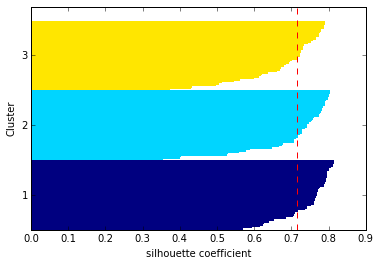

In [34]:
from sklearn.metrics import silhouette_samples
from matplotlib import cm
import numpy as np

cluster_labels = np.unique(y_km)       　# y_kmの要素の中で重複を無くす
n_clusters=cluster_labels.shape[0]     # 配列の長さを返す。つまりここでは n_clustersで指定した3となる

# シルエット係数を計算
silhouette_vals = silhouette_samples(X,y_km,metric='euclidean')  # サンプルデータ, クラスター番号、ユークリッド距離でシルエット係数計算
y_ax_lower, y_ax_upper= 0,0
yticks = []

for i,c in enumerate(cluster_labels):
        c_silhouette_vals = silhouette_vals[y_km==c]      # cluster_labelsには 0,1,2が入っている（enumerateなのでiにも0,1,2が入ってる（たまたま））
        c_silhouette_vals.sort()
        y_ax_upper += len(c_silhouette_vals)              # サンプルの個数をクラスターごとに足し上げてy軸の最大値を決定
        color = cm.jet(float(i)/n_clusters)               　　　　　　# 色の値を作る
        plt.barh(range(y_ax_lower,y_ax_upper),      　　　# 水平の棒グラフのを描画（底辺の範囲を指定）
                         c_silhouette_vals,               　　　　　　　　　　　　　　　# 棒の幅（1サンプルを表す）
                         height=1.0,                      　　　　　　　　　　　　　　　　　　　# 棒の高さ
                         edgecolor='none',                　　　　　　　　　　　　　　# 棒の端の色
                         color=color)                     　　　　　　　　　　　　　　　　　　# 棒の色
        yticks.append((y_ax_lower+y_ax_upper)/2)　# クラスタラベルの表示位置を追加
        y_ax_lower += len(c_silhouette_vals)            　# 底辺の値に棒の幅を追加

silhouette_avg = np.mean(silhouette_vals)                 　　　　# シルエット係数の平均値
plt.axvline(silhouette_avg,color="red",linestyle="--")    # 係数の平均値に破線を引く 
plt.yticks(yticks,cluster_labels + 1)                     　　　　　　　　　　　　　# クラスタラベルを表示
plt.ylabel('Cluster')
plt.xlabel('silhouette coefficient')
plt.show()

__ シルエット図の見方__

クラスターの「シルエット係数 silhouette coefficient 」が 1に近いほど、そのクラスターは他のクラスターから遠く離れていることを表します（係数は -1 ~ 1の値）

すなわち、一に近いほどクラスタリングの精度が良いです。

0に近いほど隣接するクラスターと接近している or 隣接するクラスターと重なっていることを表す（上手くクラスターの分離ができていない状態）。さらに、係数がマイナス値だとクラスター化されたサンプルは間違ったクラスターに所属している可能性があります。

![](https://qiita-image-store.s3.amazonaws.com/0/132984/aeb679e5-2d33-be8d-ac99-7fa7edaeb224.png)

参考：http://qiita.com/deaikei/items/11a10fde5bb47a2cf2c2

#### クラスタリングが上手に言ってない場合の例
__本当はクラスターが3つ__に分かれているのに、__2クラスターに分離__させようとした場合は以下の様なシルエット図となります。

/Users/tsuruoka/.pyenv/versions/anaconda3-2.4.0/lib/python3.5/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


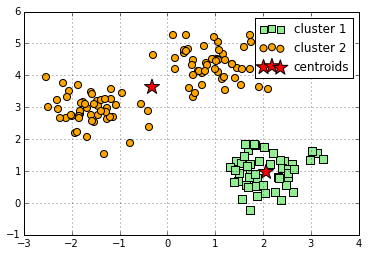

In [36]:
km = KMeans(n_clusters=2,            # クラスターの個数
            init='k-means++',                  # セントロイドの初期値をランダムに設定
            n_init=10,                              # 異なるセントロイドの初期値を用いたk-meansあるゴリmズムの実行回数
            max_iter=300,                      # k-meansアルゴリズムの内部の最大イテレーション回数
            tol=1e-04,                             # 収束と判定するための相対的な許容誤差
            random_state=0)                 # セントロイドの初期化に用いる乱数発生器の状態
y_km = km.fit_predict(X)

plt.scatter(X[y_km==0,0],
                   X[y_km==0,1],
                    s=50,
                    c='lightgreen',
                    marker='s',
                    label='cluster 1')
plt.scatter(X[y_km==1,0],
                   X[y_km==1,1],
                    s=50,
                    c='orange',
                    marker='o',
                    label='cluster 2')
plt.scatter(km.cluster_centers_[:,0],
                    km.cluster_centers_[:,1],
                    s=250,
                    marker='*',
                    c='red',
                    label='centroids')
plt.legend()
plt.grid()
plt.show()

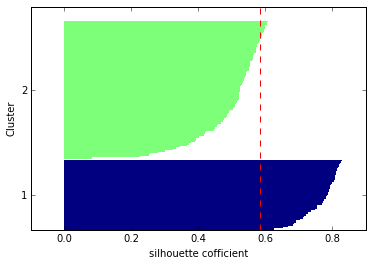

In [37]:
cluster_labels = np.unique(y_km)         # y_kmの要素の中で重複を無くす
n_clusters=cluster_labels.shape[0]     # 配列の長さを返す

# シルエット係数を計算
silhouette_vals = silhouette_samples(X,y_km,metric='euclidean')
y_ax_lower, y_ax_upper= 0,0
yticks = []

for i,c in enumerate(cluster_labels):
        c_silhouette_vals = silhouette_vals[y_km==c]
        c_silhouette_vals.sort()
        y_ax_upper += len(c_silhouette_vals)
        color = cm.jet(float(i)/n_clusters)                        # 色の値をセット
        plt.barh(range(y_ax_lower,y_ax_upper),            # 水平の棒グラフのを描画（底辺の範囲を指定）
                         c_silhouette_vals,                                  # 棒の幅 
                         height=1.0,                                             # 棒の高さ
                         edgecolor='none',                                  # 棒の端の色
                         color=color)                                            # 棒の色
        yticks.append((y_ax_lower+y_ax_upper)/2)    # クラスタラベルの保油次位置を追加
        y_ax_lower += len(c_silhouette_vals)                # 底辺の値に棒の幅を追加

silhouette_avg = np.mean(silhouette_vals)                      # シルエット係数の平均値
plt.axvline(silhouette_avg,color="red",linestyle="--")    # 係数の平均値に破線を引く 
plt.yticks(yticks,cluster_labels + 1)                                   # クラスタレベルを表示
plt.ylabel('Cluster')
plt.xlabel('silhouette cofficient')
plt.show()

上記のグラフのように、クラスタ２のシルエットが厚いので、片方にサンプルが寄りすぎています。さらに、クラスタ1,2のシルエット係数平均値（赤い点線）をクラスタ２はほどんどが下回っています。

このように、シルエット図をプロットすることによって、最適なクラスタ分割かどうかを視覚的に判断できるようになりました。